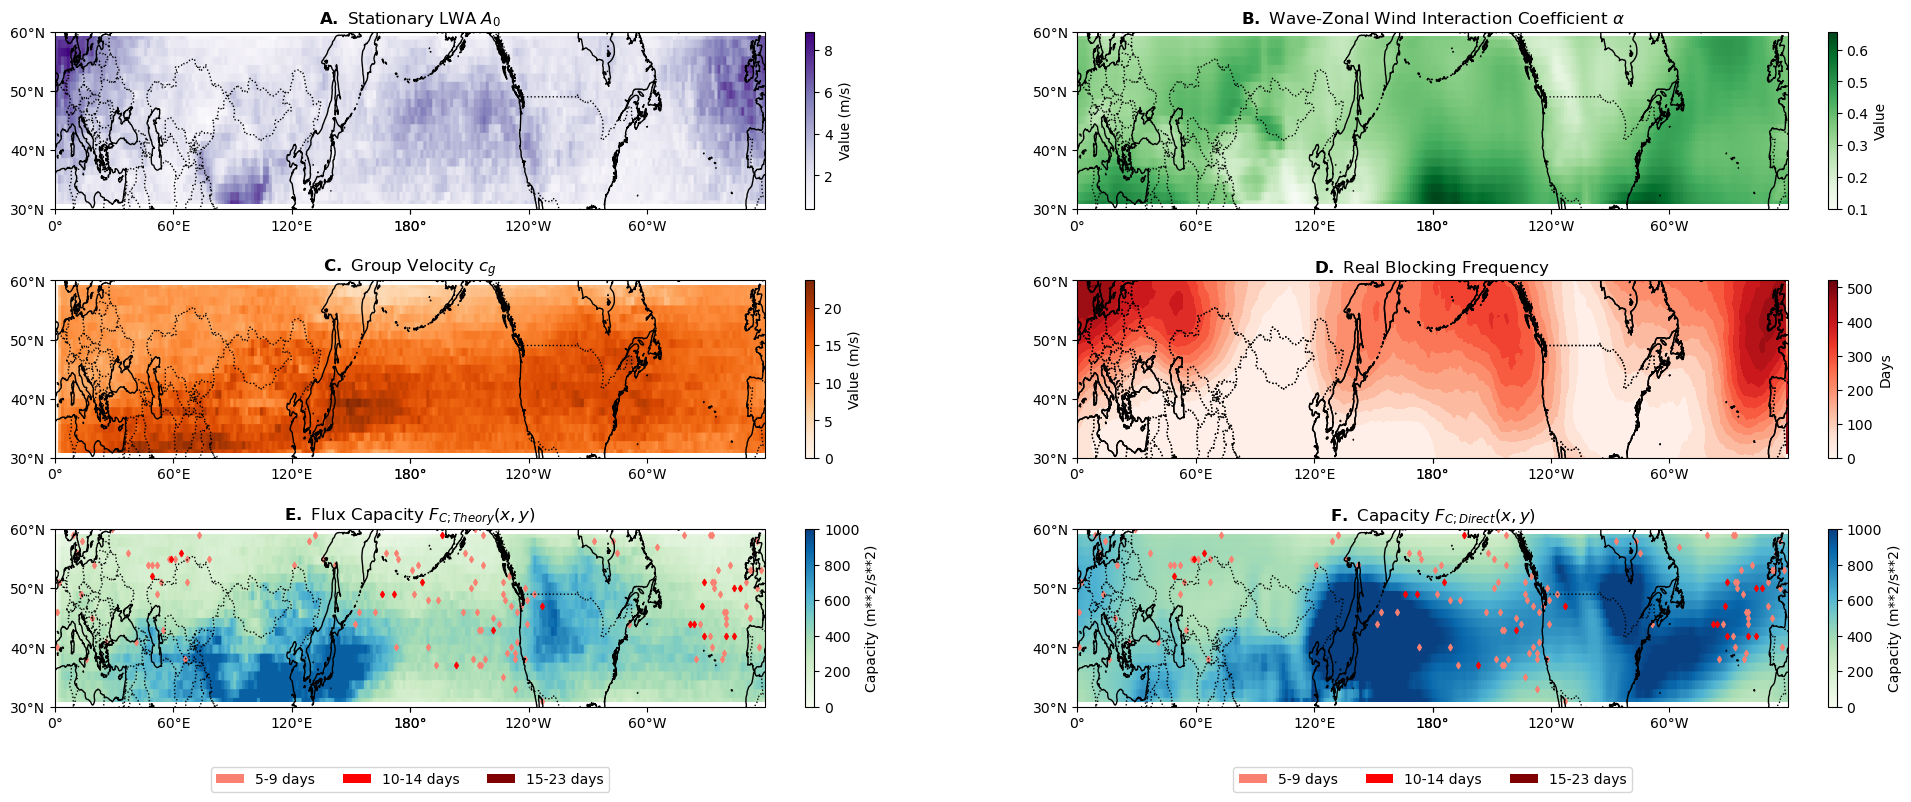

In [3]:
####### Fig 1
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature

# Load data for all four plots 

output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model/"
A0_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_A0_winter.npy")
slope_data_djf_file = os.path.join(output_directory, "alpha_regression_DJF", "slope_data_djf.npy")
reduced_Cg_file = os.path.join(output_directory, "hn2016-falwa_calculation", "reduced_Cg.npy")
capacity_file = os.path.join(output_directory, "hn2016-falwa_calculation", "NH18FluxCapacity.npy")
blocking_data_NH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0NH.npy")
blocking_data_SH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0SH.npy")

# Load the arrays
A0_winter = np.load(A0_winter_file)[80:101, :]
slope_data_djf = -np.load(slope_data_djf_file)[80:101, :]
reduced_Cg = np.load(reduced_Cg_file)[80:101, :]
capacity = np.load(capacity_file)
blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)



real_capacity = np.load('/depot/wanglei/etc/KenYan_Traffic_Model/Flux_Capacity_DJF.npy')
# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(real_capacity, 1)
vmax_val = np.nanpercentile(real_capacity, 99)
# print(vmin_val)
# print(vmax_val)
# Clip the capacity values to lie within the determined min and max
real_capacity = np.clip(real_capacity, vmin_val, vmax_val)


blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")

# Latitude and Longitude data
Lat = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")

# Filter out the latitudes that are outside of 30N to 60N
lat_indices = np.where((Lat >= 30) & (Lat <= 60))[0]
Lat = Lat[lat_indices]
BlockingFreq = BlockingFreq[lat_indices, :]

# Other required data and calculations for the fourth plot
blocking_data = np.vstack((blocking_data_NH, blocking_data_SH))
filtered_blocking_data = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered_blocking_data.append(event)
blocking_data = np.array(filtered_blocking_data)

longitudes = [int(row[2].split(":")[1].strip()) for row in blocking_data]
latitudes = [int(row[3].split(":")[1].strip()) for row in blocking_data]
durations = [int(row[1].split(":")[1].strip()) for row in blocking_data]

blocking_grid_5_9 = np.zeros((121, 240))
blocking_grid_10_14 = np.zeros((121, 240))
blocking_grid_15_23 = np.zeros((121, 240))

for lon, lat, duration in zip(longitudes, latitudes, durations):
    if 5 <= duration <= 9:
        blocking_grid_5_9[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 10 <= duration <= 14:
        blocking_grid_10_14[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 15 <= duration <= 23:
        blocking_grid_15_23[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1

vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)
capacity = np.clip(capacity, vmin_val, vmax_val)
lat_indices = np.arange(int((30 + 90) * 121 / 180), int((60 + 90) * 121 / 180))
capacity_subset = capacity[lat_indices, :]
real_capacity_subset = real_capacity[lat_indices, :]
blocking_grid_5_9_subset = blocking_grid_5_9[lat_indices, :]
blocking_grid_10_14_subset = blocking_grid_10_14[lat_indices, :]
blocking_grid_15_23_subset = blocking_grid_15_23[lat_indices, :]



fig, axs = plt.subplots(3, 2, figsize=(22.5, 7.5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})




# Define a common colormap for all plots
common_cmap = 'GnBu'

# Define function to plot each map to avoid repetition
def plot_map(ax, data, title, transform=ccrs.PlateCarree(), cmap=common_cmap, vmin=None, vmax=None):
    ax.set_extent([0, 361, 30, 60], transform)
    heatmap = ax.imshow(data, extent=[0, 361, 30, 60], transform=transform, cmap=cmap, origin='lower', aspect=3, vmin=vmin, vmax=vmax)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([30, 40, 50, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_title(title)
    return heatmap

# Define individual colormaps for plots A, B, C, and D
cmap_A = 'Purples'
cmap_B = 'Greens'
cmap_C = 'Oranges'
cmap_D = 'Reds'

# Plot 1-4 with updated colormaps
heatmap1 = plot_map(axs[0, 0], A0_winter, r'$\mathbf{A. }$ Stationary LWA $A_0$', cmap=cmap_A)
heatmap2 = plot_map(axs[0, 1], slope_data_djf, r'$\mathbf{B. }$ Wave-Zonal Wind Interaction Coefficient $\alpha$', cmap=cmap_B)
heatmap3 = plot_map(axs[1, 0], reduced_Cg, r'$\mathbf{C. }$ Group Velocity $c_g$', cmap=cmap_C)
heatmap4 = plot_map(axs[1, 1], BlockingFreq, r'$\mathbf{D. }$ Real Blocking Frequency', cmap=cmap_D)


ax6 = axs[1, 1]
contour = ax6.contourf(Lon, Lat, BlockingFreq, 15, transform=ccrs.PlateCarree(), cmap=cmap_D)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')

# Plot 4: Capacity with Blocking Events
ax4 = axs[2, 0]
cs = plot_map(ax4, capacity_subset, r'$\mathbf{E. }$ Flux Capacity $F_{C; Theory}(x,y)$', vmin=0, vmax=1000)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

# Plot 5: Capacity with Blocking Events

ax5 = axs[2, 1]
cs2 = plot_map(ax5, real_capacity_subset, r'$\mathbf{F. }$ Capacity $F_{C; Direct}(x,y)$', vmin=0, vmax=1000)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax5.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax4.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


# Add colorbars for each plot
cbar_labels = ['Value (m/s)', 'Value', 'Value (m/s)', 'Days', 'Capacity (m**2/s**2)', 'Capacity (m**2/s**2)']
for i, heatmap in enumerate([heatmap1, heatmap2, heatmap3, heatmap4, cs, cs2]):
    row, col = divmod(i, 2)
    cbar = fig.colorbar(heatmap, ax=axs[row, col], orientation='vertical', fraction=0.03, pad=0.04)
    cbar.set_label(cbar_labels[i])


# Adjust legend for Plot 4 to spread horizontally and center below the plots
legend_elements = [
    Patch(facecolor='salmon', label='5-9 days'),
    Patch(facecolor='red', label='10-14 days'),
    Patch(facecolor='maroon', label='15-23 days')
]
# Place the legend at the center bottom of the figure
legend = axs[2, 0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
legend = axs[2, 1].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)



# Adjust layout to remove excessive margins
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.01, hspace=0.4)

# Show the plot
plt.show()

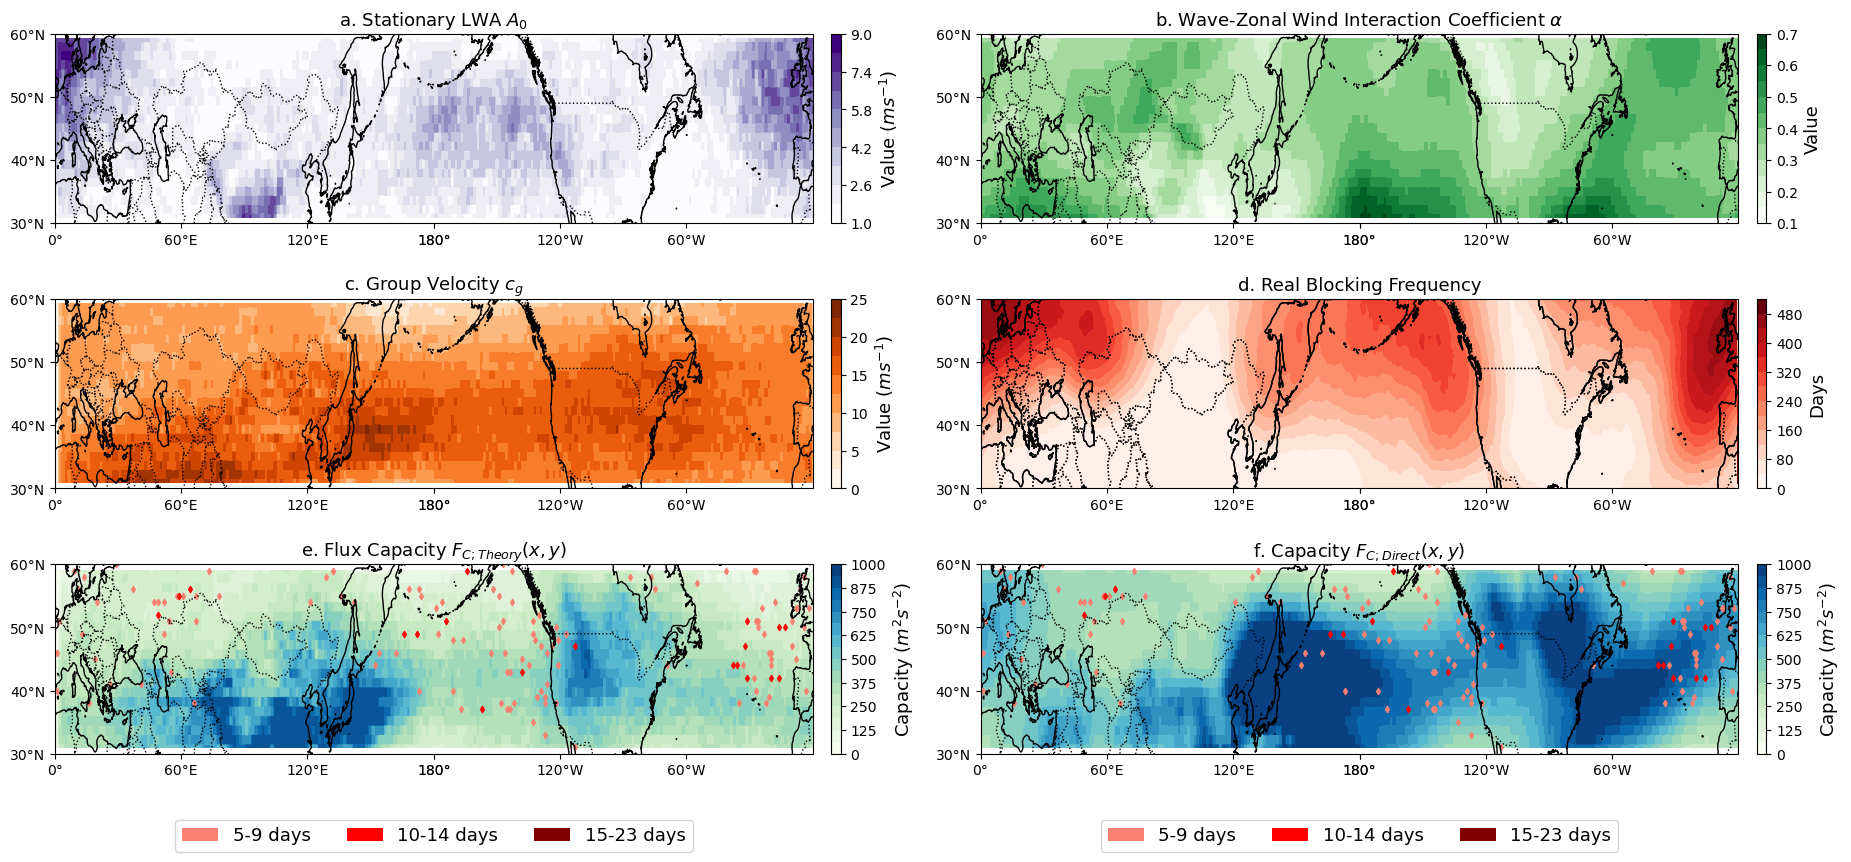

In [14]:
####### Fig 1 ver 0524
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Load data for all four plots 

output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model/"
A0_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_A0_winter.npy")
slope_data_djf_file = os.path.join(output_directory, "alpha_regression_DJF", "slope_data_djf.npy")
reduced_Cg_file = os.path.join(output_directory, "hn2016-falwa_calculation", "reduced_Cg.npy")
capacity_file = os.path.join(output_directory, "hn2016-falwa_calculation", "NH18FluxCapacity.npy")
blocking_data_NH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0NH.npy")
blocking_data_SH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0SH.npy")

# Load the arrays
A0_winter = np.load(A0_winter_file)[80:101, :]
slope_data_djf = -np.load(slope_data_djf_file)[80:101, :]
reduced_Cg = np.load(reduced_Cg_file)[80:101, :]
capacity = np.load(capacity_file)
blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)



real_capacity = np.load('/depot/wanglei/etc/KenYan_Traffic_Model/Flux_Capacity_DJF.npy')
# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(real_capacity, 1)
vmax_val = np.nanpercentile(real_capacity, 99)
# print(vmin_val)
# print(vmax_val)
# Clip the capacity values to lie within the determined min and max
real_capacity = np.clip(real_capacity, vmin_val, vmax_val)


blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")

# Latitude and Longitude data
Lat = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")

# Filter out the latitudes that are outside of 30N to 60N
lat_indices = np.where((Lat >= 30) & (Lat <= 60))[0]
Lat = Lat[lat_indices]
BlockingFreq = BlockingFreq[lat_indices, :]

# Other required data and calculations for the fourth plot
blocking_data = np.vstack((blocking_data_NH, blocking_data_SH))
filtered_blocking_data = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered_blocking_data.append(event)
blocking_data = np.array(filtered_blocking_data)

longitudes = [int(row[2].split(":")[1].strip()) for row in blocking_data]
latitudes = [int(row[3].split(":")[1].strip()) for row in blocking_data]
durations = [int(row[1].split(":")[1].strip()) for row in blocking_data]

blocking_grid_5_9 = np.zeros((121, 240))
blocking_grid_10_14 = np.zeros((121, 240))
blocking_grid_15_23 = np.zeros((121, 240))

for lon, lat, duration in zip(longitudes, latitudes, durations):
    if 5 <= duration <= 9:
        blocking_grid_5_9[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 10 <= duration <= 14:
        blocking_grid_10_14[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 15 <= duration <= 23:
        blocking_grid_15_23[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1

vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)
capacity = np.clip(capacity, vmin_val, vmax_val)
lat_indices = np.arange(int((30 + 90) * 121 / 180), int((60 + 90) * 121 / 180))
capacity_subset = capacity[lat_indices, :]
real_capacity_subset = real_capacity[lat_indices, :]
blocking_grid_5_9_subset = blocking_grid_5_9[lat_indices, :]
blocking_grid_10_14_subset = blocking_grid_10_14[lat_indices, :]
blocking_grid_15_23_subset = blocking_grid_15_23[lat_indices, :]

levs1 = np.linspace(1, 9, 11)
norm1 = BoundaryNorm(levs1, ncolors = 256, clip = True)

levs2 = np.linspace(0.1, 0.7, 13)
norm2 = BoundaryNorm(levs2, ncolors = 256, clip = True)

levs3 = np.linspace(0, 25, 11)
norm3 = BoundaryNorm(levs3, ncolors = 256, clip = True)

levs4 = np.linspace(0, 520, 14)
norm4 = BoundaryNorm(levs4, ncolors = 256, clip = True)

levs5 = np.linspace(0, 1000, 17)
norm5 = BoundaryNorm(levs5, ncolors = 256, clip = True)

fig, axs = plt.subplots(3, 2, figsize=(22.5, 7.5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})




# Define a common colormap for all plots
common_cmap = 'GnBu'

# Define function to plot each map with font adjustments
def plot_map(ax, data, title, transform=ccrs.PlateCarree(), cmap='GnBu', vmin=None, vmax=None, norm=None):
    ax.set_extent([0, 361, 30, 60], transform)
    heatmap = ax.imshow(data, extent=[0, 361, 30, 60], transform=transform, cmap=cmap, origin='lower', aspect=3, vmin=vmin, vmax=vmax, norm=norm)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([30, 40, 50, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_title(title, fontsize=13)  # Set font size for titles
    return heatmap

# Define individual colormaps for plots A, B, C, and D
cmap_A = 'Purples'
cmap_B = 'Greens'
cmap_C = 'Oranges'
cmap_D = 'Reds'

# Plot 1-4 with updated colormaps
heatmap1 = plot_map(axs[0, 0], A0_winter, r'a. Stationary LWA $A_0$', cmap=cmap_A, norm = norm1)
heatmap2 = plot_map(axs[0, 1], slope_data_djf, r'b. Wave-Zonal Wind Interaction Coefficient $\alpha$', cmap=cmap_B, norm = norm2)
heatmap3 = plot_map(axs[1, 0], reduced_Cg, r'c. Group Velocity $c_g$', cmap=cmap_C, norm = norm3)
heatmap4 = plot_map(axs[1, 1], BlockingFreq, r'd. Real Blocking Frequency', cmap=cmap_D, norm = norm4)


ax6 = axs[1, 1]
contour = ax6.contourf(Lon, Lat, BlockingFreq, 15, transform=ccrs.PlateCarree(), cmap=cmap_D)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')

# Plot 4: Capacity with Blocking Events
ax4 = axs[2, 0]
cs = plot_map(ax4, capacity_subset, r'e. Flux Capacity $F_{C; Theory}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

# Plot 5: Capacity with Blocking Events

ax5 = axs[2, 1]
cs2 = plot_map(ax5, real_capacity_subset, r'f. Capacity $F_{C; Direct}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax5.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax4.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


# Add colorbars for each plot
cbar_labels = [r'Value ($ms^{-1}$)', 'Value', r'Value ($ms^{-1}$)', 'Days', r'Capacity ($m^2s^{-2}$)', r'Capacity ($m^2s^{-2}$)']
for i, heatmap in enumerate([heatmap1, heatmap2, heatmap3, heatmap4, cs, cs2]):
    row, col = divmod(i, 2)
    cbar = fig.colorbar(heatmap, ax=axs[row, col], orientation='vertical', fraction=0.03, pad=0.015)
    cbar.set_label(cbar_labels[i], fontsize=13)


# Adjust legend for Plot 4 to spread horizontally and center below the plots
legend_elements = [
    Patch(facecolor='salmon', label='5-9 days'),
    Patch(facecolor='red', label='10-14 days'),
    Patch(facecolor='maroon', label='15-23 days')
]
# Place the legend at the center bottom of the figure
legend = axs[2, 0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=13)  # Set font size for legend
legend = axs[2, 1].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=13)  # Set font size for legend



# Adjust layout to remove excessive margins
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02, wspace=-0.25, hspace=0.4)

# Show the plot
plt.show()

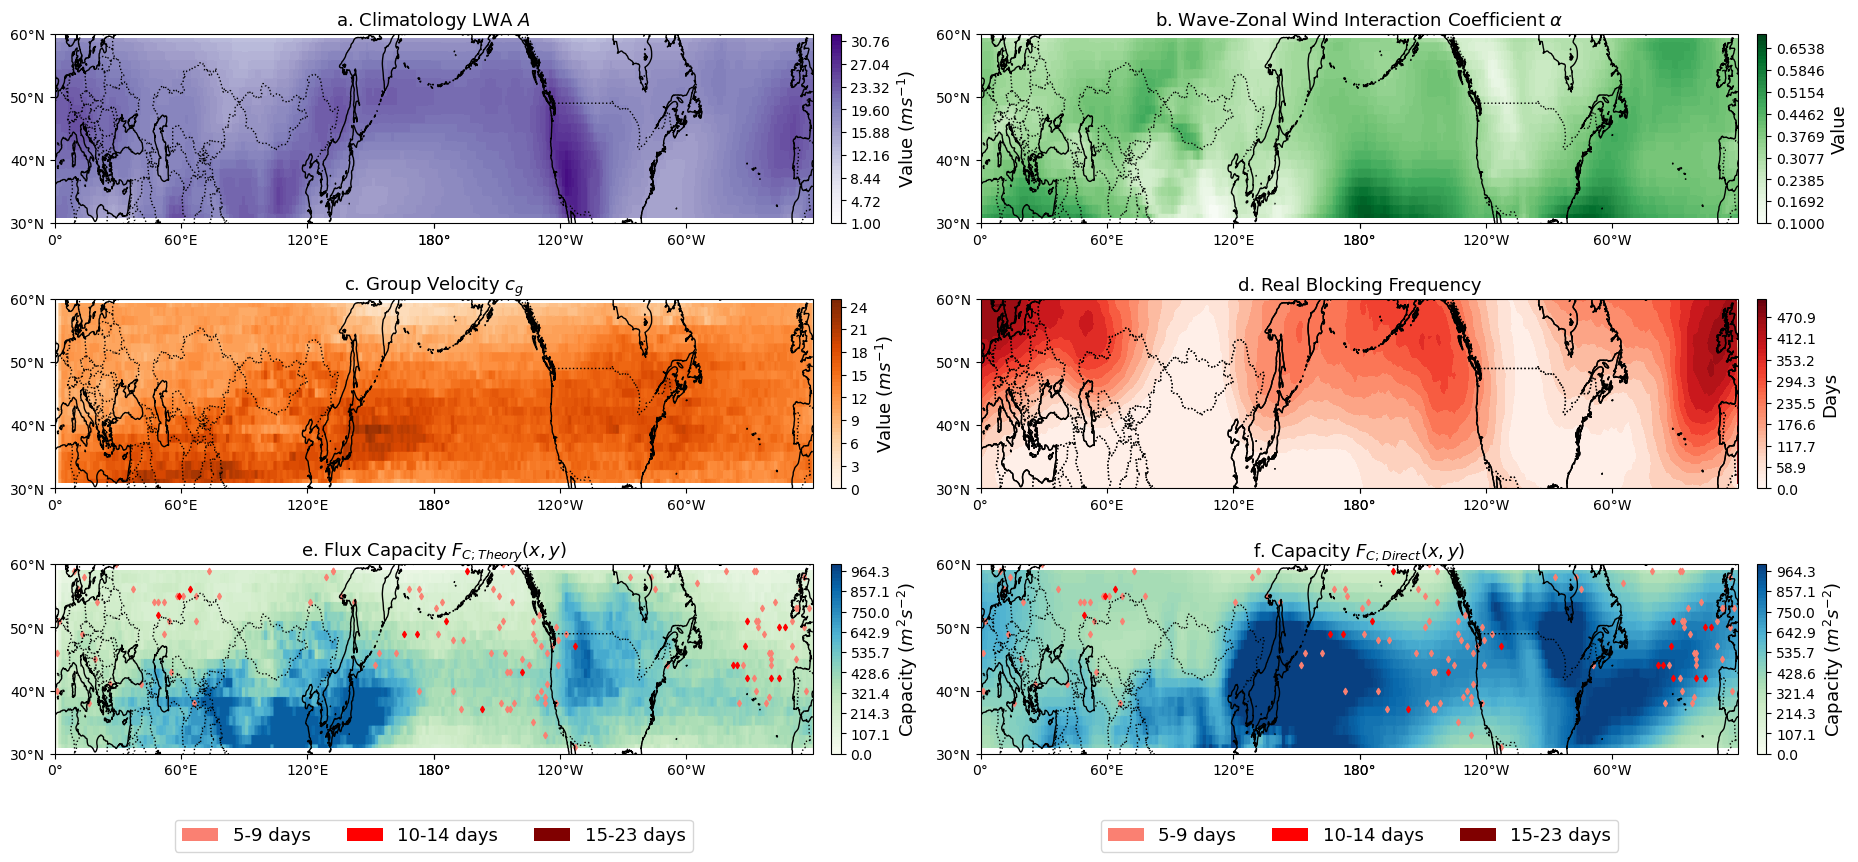

In [4]:
####### Fig 1 ver 0602 - fig e is wrong!!! distinguish A0 and mean LWA
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Load data for all four plots 

output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model/"
A0_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_LWA_2Dmean.npy")
slope_data_djf_file = os.path.join(output_directory, "alpha_regression_DJF", "slope_data_djf.npy")
reduced_Cg_file = os.path.join(output_directory, "hn2016-falwa_calculation", "reduced_Cg.npy")
capacity_file = os.path.join(output_directory, "hn2016-falwa_calculation", "NH18FluxCapacity.npy")
blocking_data_NH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0NH.npy")
blocking_data_SH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0SH.npy")

# Load the arrays
A0_winter = np.load(A0_winter_file)[80:101, :]
slope_data_djf = -np.load(slope_data_djf_file)[80:101, :]
reduced_Cg = np.load(reduced_Cg_file)[80:101, :]
capacity = np.load(capacity_file)
blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)



real_capacity = np.load('/depot/wanglei/etc/KenYan_Traffic_Model/Flux_Capacity_DJF.npy')
# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(real_capacity, 1)
vmax_val = np.nanpercentile(real_capacity, 99)
# print(vmin_val)
# print(vmax_val)
# Clip the capacity values to lie within the determined min and max
real_capacity = np.clip(real_capacity, vmin_val, vmax_val)


blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")

# Latitude and Longitude data
Lat = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")

# Filter out the latitudes that are outside of 30N to 60N
lat_indices = np.where((Lat >= 30) & (Lat <= 60))[0]
Lat = Lat[lat_indices]
BlockingFreq = BlockingFreq[lat_indices, :]

# Other required data and calculations for the fourth plot
blocking_data = np.vstack((blocking_data_NH, blocking_data_SH))
filtered_blocking_data = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered_blocking_data.append(event)
blocking_data = np.array(filtered_blocking_data)

longitudes = [int(row[2].split(":")[1].strip()) for row in blocking_data]
latitudes = [int(row[3].split(":")[1].strip()) for row in blocking_data]
durations = [int(row[1].split(":")[1].strip()) for row in blocking_data]

blocking_grid_5_9 = np.zeros((121, 240))
blocking_grid_10_14 = np.zeros((121, 240))
blocking_grid_15_23 = np.zeros((121, 240))

for lon, lat, duration in zip(longitudes, latitudes, durations):
    if 5 <= duration <= 9:
        blocking_grid_5_9[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 10 <= duration <= 14:
        blocking_grid_10_14[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 15 <= duration <= 23:
        blocking_grid_15_23[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1

vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)
capacity = np.clip(capacity, vmin_val, vmax_val)
lat_indices = np.arange(int((30 + 90) * 121 / 180), int((60 + 90) * 121 / 180))
capacity_subset = capacity[lat_indices, :]
real_capacity_subset = real_capacity[lat_indices, :]
blocking_grid_5_9_subset = blocking_grid_5_9[lat_indices, :]
blocking_grid_10_14_subset = blocking_grid_10_14[lat_indices, :]
blocking_grid_15_23_subset = blocking_grid_15_23[lat_indices, :]

levs1 = np.linspace(1, 32, 51)
norm1 = BoundaryNorm(levs1, ncolors = 256, clip = True)

levs2 = np.linspace(0.1, 0.7, 53)
norm2 = BoundaryNorm(levs2, ncolors = 256, clip = True)

levs3 = np.linspace(0, 25, 51)
norm3 = BoundaryNorm(levs3, ncolors = 256, clip = True)

levs4 = np.linspace(0, 520, 54)
norm4 = BoundaryNorm(levs4, ncolors = 256, clip = True)

levs5 = np.linspace(0, 1000, 57)
norm5 = BoundaryNorm(levs5, ncolors = 256, clip = True)

fig, axs = plt.subplots(3, 2, figsize=(22.5, 7.5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})




# Define a common colormap for all plots
common_cmap = 'GnBu'

# Define function to plot each map with font adjustments
def plot_map(ax, data, title, transform=ccrs.PlateCarree(), cmap='GnBu', vmin=None, vmax=None, norm=None):
    ax.set_extent([0, 361, 30, 60], transform)
    heatmap = ax.imshow(data, extent=[0, 361, 30, 60], transform=transform, cmap=cmap, origin='lower', aspect=3, vmin=vmin, vmax=vmax, norm=norm)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([30, 40, 50, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_title(title, fontsize=13)  # Set font size for titles
    return heatmap

# Define individual colormaps for plots A, B, C, and D
cmap_A = 'Purples'
cmap_B = 'Greens'
cmap_C = 'Oranges'
cmap_D = 'Reds'

# Plot 1-4 with updated colormaps
heatmap1 = plot_map(axs[0, 0], A0_winter, r'a. Climatology Local Wave Activity $A$', cmap=cmap_A, norm = norm1)
heatmap2 = plot_map(axs[0, 1], slope_data_djf, r'b. Wave-Zonal Wind Interaction Coefficient $\alpha$', cmap=cmap_B, norm = norm2)
heatmap3 = plot_map(axs[1, 0], reduced_Cg, r'c. Group Velocity $c_g$', cmap=cmap_C, norm = norm3)
heatmap4 = plot_map(axs[1, 1], BlockingFreq, r'd. Real Blocking Frequency', cmap=cmap_D, norm = norm4)


ax6 = axs[1, 1]
contour = ax6.contourf(Lon, Lat, BlockingFreq, 15, transform=ccrs.PlateCarree(), cmap=cmap_D)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')

# Plot 4: Capacity with Blocking Events
ax4 = axs[2, 0]
cs = plot_map(ax4, capacity_subset, r'e. Flux Capacity $F_{C; Theory}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

# Plot 5: Capacity with Blocking Events

ax5 = axs[2, 1]
cs2 = plot_map(ax5, real_capacity_subset, r'f. Capacity $F_{C; Direct}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax5.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax4.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


# Add colorbars for each plot
cbar_labels = [r'Value ($ms^{-1}$)', 'Value', r'Value ($ms^{-1}$)', 'Days', r'Capacity ($m^2s^{-2}$)', r'Capacity ($m^2s^{-2}$)']
for i, heatmap in enumerate([heatmap1, heatmap2, heatmap3, heatmap4, cs, cs2]):
    row, col = divmod(i, 2)
    cbar = fig.colorbar(heatmap, ax=axs[row, col], orientation='vertical', fraction=0.03, pad=0.015)
    cbar.set_label(cbar_labels[i], fontsize=13)


# Adjust legend for Plot 4 to spread horizontally and center below the plots
legend_elements = [
    Patch(facecolor='salmon', label='5-9 days'),
    Patch(facecolor='red', label='10-14 days'),
    Patch(facecolor='maroon', label='15-23 days')
]
# Place the legend at the center bottom of the figure
legend = axs[2, 0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=13)  # Set font size for legend
legend = axs[2, 1].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=13)  # Set font size for legend



# Adjust layout to remove excessive margins
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02, wspace=-0.25, hspace=0.4)

# Show the plot
plt.show()

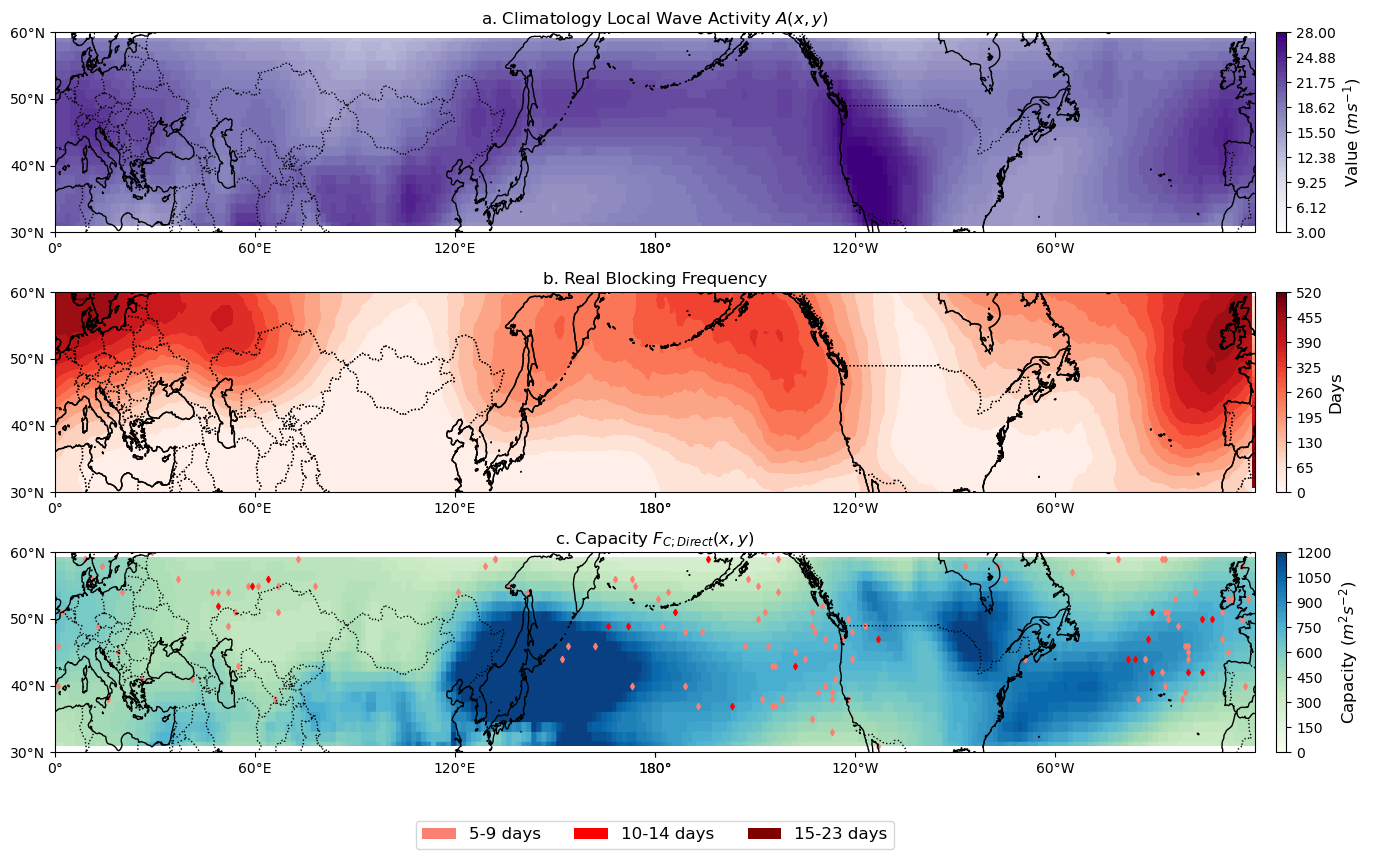

In [30]:
####### Fig 1 ver 0602
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Load data
output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model/"
A0_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_LWA_2Dmean.npy")
slope_data_djf_file = os.path.join(output_directory, "alpha_regression_DJF", "slope_data_djf.npy")
reduced_Cg_file = os.path.join(output_directory, "hn2016-falwa_calculation", "reduced_Cg.npy")
capacity_file = os.path.join(output_directory, "hn2016-falwa_calculation", "NH18FluxCapacity.npy")
blocking_data_NH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0NH.npy")
blocking_data_SH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0SH.npy")

# Load the arrays
A0_winter = np.load(A0_winter_file)[80:101, :]
slope_data_djf = -np.load(slope_data_djf_file)[80:101, :]
reduced_Cg = np.load(reduced_Cg_file)[80:101, :]
capacity = np.load(capacity_file)
blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


real_capacity = np.load('/depot/wanglei/etc/KenYan_Traffic_Model/Flux_Capacity_DJF.npy')
vmin_val = np.nanpercentile(real_capacity, 1)
vmax_val = np.nanpercentile(real_capacity, 99)
real_capacity = np.clip(real_capacity, vmin_val, vmax_val)


blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")

# Latitude and Longitude data
Lat = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")

# Filter out the latitudes that are outside of 30N to 60N
lat_indices = np.where((Lat >= 30) & (Lat <= 60))[0]
Lat = Lat[lat_indices]
BlockingFreq = BlockingFreq[lat_indices, :]

# Other required data and calculations for the fourth plot
blocking_data = np.vstack((blocking_data_NH, blocking_data_SH))
filtered_blocking_data = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered_blocking_data.append(event)
blocking_data = np.array(filtered_blocking_data)

longitudes = [int(row[2].split(":")[1].strip()) for row in blocking_data]
latitudes = [int(row[3].split(":")[1].strip()) for row in blocking_data]
durations = [int(row[1].split(":")[1].strip()) for row in blocking_data]

blocking_grid_5_9 = np.zeros((121, 240))
blocking_grid_10_14 = np.zeros((121, 240))
blocking_grid_15_23 = np.zeros((121, 240))

for lon, lat, duration in zip(longitudes, latitudes, durations):
    if 5 <= duration <= 9:
        blocking_grid_5_9[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 10 <= duration <= 14:
        blocking_grid_10_14[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 15 <= duration <= 23:
        blocking_grid_15_23[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1

vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)
capacity = np.clip(capacity, vmin_val, vmax_val)
lat_indices = np.arange(int((30 + 90) * 121 / 180), int((60 + 90) * 121 / 180))
capacity_subset = capacity[lat_indices, :]
real_capacity_subset = real_capacity[lat_indices, :]
blocking_grid_5_9_subset = blocking_grid_5_9[lat_indices, :]
blocking_grid_10_14_subset = blocking_grid_10_14[lat_indices, :]
blocking_grid_15_23_subset = blocking_grid_15_23[lat_indices, :]

levs1 = np.linspace(3, 28, 41)
norm1 = BoundaryNorm(levs1, ncolors = 256, clip = True)

levs2 = np.linspace(0.1, 0.7, 41)
norm2 = BoundaryNorm(levs2, ncolors = 256, clip = True)

levs3 = np.linspace(0, 25, 41)
norm3 = BoundaryNorm(levs3, ncolors = 256, clip = True)

levs4 = np.linspace(0, 520, 41)
norm4 = BoundaryNorm(levs4, ncolors = 256, clip = True)

levs5 = np.linspace(0, 1200, 41)
norm5 = BoundaryNorm(levs5, ncolors = 256, clip = True)

fig, axs = plt.subplots(3, 1, figsize=(15, 7.5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})



# Define a common colormap for all plots
common_cmap = 'GnBu'

# Define function to plot each map with font adjustments
def plot_map(ax, data, title, transform=ccrs.PlateCarree(), cmap='GnBu', vmin=None, vmax=None, norm=None):
    ax.set_extent([0, 361, 30, 60], transform)
    heatmap = ax.imshow(data, extent=[0, 361, 30, 60], transform=transform, cmap=cmap, origin='lower', aspect=2, vmin=vmin, vmax=vmax, norm=norm)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([30, 40, 50, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_title(title, fontsize=12)  # Set font size for titles
    return heatmap

# Define individual colormaps for plots A, B, C, and D
cmap_A = 'Purples'
cmap_B = 'Greens'
cmap_C = 'Oranges'
cmap_D = 'Reds'

# Plot 1-4 with updated colormaps
heatmap1 = plot_map(axs[0], A0_winter, r'a. Climatology Local Wave Activity $A(x,y)$', cmap=cmap_A, norm = norm1)
heatmap3 = plot_map(axs[1], BlockingFreq, r'b. Real Blocking Frequency', cmap=cmap_D, norm = norm4)


ax6 = axs[1]
contour = ax6.contourf(Lon, Lat, BlockingFreq, 15, transform=ccrs.PlateCarree(), cmap=cmap_D)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')

# Plot 4: Capacity with Blocking Events
ax4 = axs[2]
cs = plot_map(ax4, real_capacity_subset, r'c. Capacity $F_{C; Direct}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)


for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax4.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


# Add colorbars for each plot
cbar_labels = [r'Value ($ms^{-1}$)', 'Days', r'Capacity ($m^2s^{-2}$)']
for i, heatmap in enumerate([heatmap1, heatmap3, cs]):
    cbar = fig.colorbar(heatmap, ax=axs[i], orientation='vertical', fraction=0.03, pad=0.015)
    cbar.set_label(cbar_labels[i], fontsize=12)



# Adjust legend for Plot 4 to spread horizontally and center below the plots
legend_elements = [
    Patch(facecolor='salmon', label='5-9 days'),
    Patch(facecolor='red', label='10-14 days'),
    Patch(facecolor='maroon', label='15-23 days')
]
# Place the legend at the center bottom of the figure
legend = axs[2].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=12)  # Set font size for legend



# Adjust layout to remove excessive margins
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02, wspace=-0.25, hspace=0.3)

# Show the plot
plt.show()

/home/yan481/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/yan481/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
100%|██████████| 8921/8921 [6:55:07<00:00,  2.79s/it]   


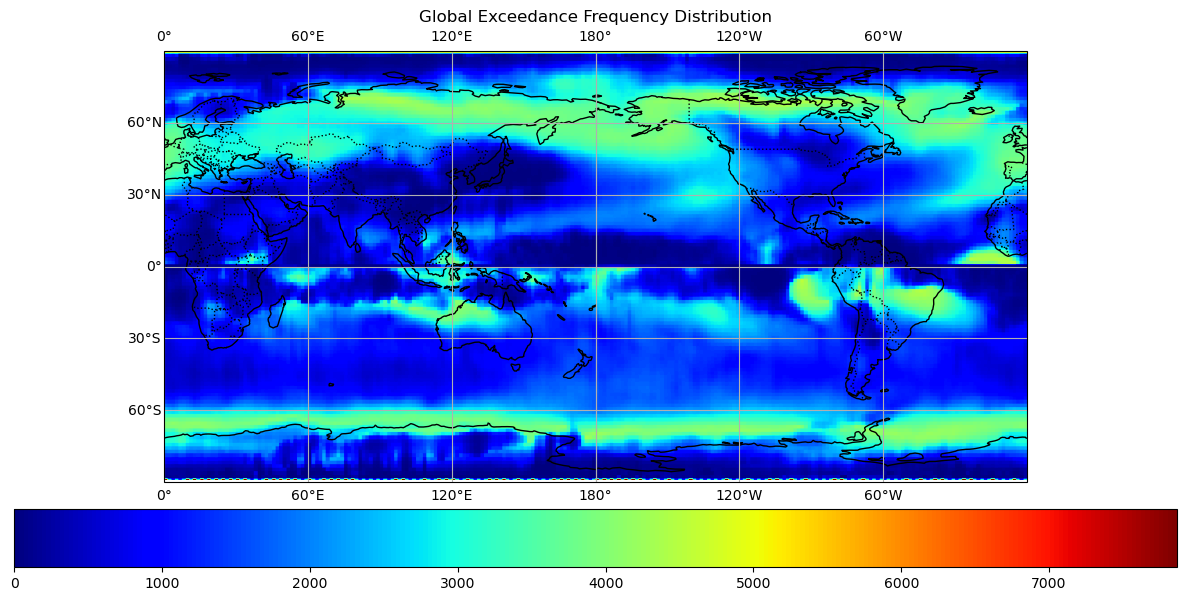

In [1]:

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import pandas as pd
from tqdm import tqdm

results_df = pd.read_csv('/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis_ver0221/filtered_results_with_hour_difference.csv')

# Load Flux Capacity Data
flux_capacity_path = "/scratch/negishi/yan481/KenYan_Traffic_Model/Flux_Capacity_DJF.npy"
flux_capacity_data = np.load(flux_capacity_path)


# Function to load flux data for a given time
def load_flux_data(year, month, day, hour):
    """
    Load flux data (F1, F2, F3) for a given date and time, and return their sum.
    The file name is expected to be in the format F1_YYYY_YYYY_MM_DD_HH.npy.
    """
    base_path = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
    f1_file = os.path.join(base_path, f"F1_{year}_{year}_{month}_{day}_{hour}.npy")
    f2_file = os.path.join(base_path, f"F2_{year}_{year}_{month}_{day}_{hour}.npy")
    f3_file = os.path.join(base_path, f"F3_{year}_{year}_{month}_{day}_{hour}.npy")

    f1 = np.load(f1_file)
    f2 = np.load(f2_file)
    f3 = np.load(f3_file)
    
    return f1 + f2 + f3

# Function to calculate grid index
def calculate_grid_index(lat, lon):
    """
    Calculate the grid index in the 121x240 flux array for a given latitude and longitude.
    Latitude range is 90 to -90 (121 steps), and longitude range is 0 to 360 (240 steps).
    """
    lat_idx = int((90 + lat) / 1.5)  # Converting latitude to index
    lon_idx = int(lon / 1.5)         # Converting longitude to index
    return lat_idx, lon_idx




# Initialize global exceedance frequency heatmap
global_exceedance_freq = np.zeros((121, 240))  # grid size 121x240

def process_event(time_str):
    global global_exceedance_freq  # Declare the variable as global

    try:
        dt = datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S")
    except ValueError:
        dt = datetime.strptime(time_str, "%Y_%m_%d_%H")

    year = dt.strftime('%Y')
    month = dt.strftime('%m')
    day = dt.strftime('%d')
    hour = dt.strftime('%H')

    total_flux = load_flux_data(year, month, day, hour)

    # Calculate flux difference
    flux_difference = total_flux - flux_capacity_data

    # Update the global heatmap
    global_exceedance_freq += (flux_difference > 0).astype(int)

    
# Process all events
for row in tqdm(results_df.itertuples(index=False), total=len(results_df)):
    process_event(row.Time)

# Save the global exceedance frequency data
save_path = "/depot/wanglei/etc/KenYan_Traffic_Model/global_exceedance_freq.npy"
np.save(save_path, global_exceedance_freq)

# # Calculate the total number of events
# total_events = len(results_df)

# # Convert frequency to percentage
# global_exceedance_freq_percentage = (global_exceedance_freq / total_events)



# Load the saved global exceedance frequency data for plotting
global_exceedance_freq = np.load(save_path)

# Set up the map using Cartopy
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

# Plot the global exceedance frequency heatmap
heatmap = ax.imshow(global_exceedance_freq, transform=ccrs.PlateCarree(), cmap='jet', origin='lower', extent=[0, 360, -90, 90])
plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.05)
plt.title('Global Exceedance Frequency Distribution')
plt.show()

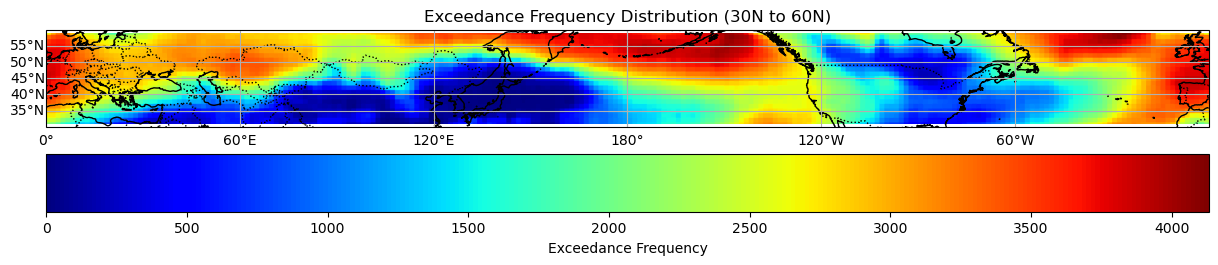

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming global_exceedance_freq is loaded or defined previously
# Select the range corresponding to 30N to 60N
y_range_data = global_exceedance_freq[80:101, :]  # Adjust indices as per your actual data grid

# Set up the map using Cartopy
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

# Define the latitude and longitude bounds
lat_start = 30
lat_end = 60
lon_start = 0
lon_end = 360

ax.set_extent([lon_start, lon_end, lat_start, lat_end], crs=ccrs.PlateCarree())  # Set extent to show 30N to 60N
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Calculate the appropriate latitude ticks within the subset
lat_ticks = np.linspace(lat_start, lat_end, num=len(y_range_data), endpoint=True)
lat_labels = [f"{lat:.1f}°N" for lat in lat_ticks]  # Label formatting

# Plot the data for the specified range
heatmap = ax.imshow(y_range_data, extent=[lon_start, lon_end, lat_start, lat_end], transform=ccrs.PlateCarree(),
                    cmap='jet', origin='lower')

# Set gridlines and labels
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.05, label='Exceedance Frequency')

plt.title('Exceedance Frequency Distribution (30N to 60N)')
plt.show()


Dimensions of the dataset: (91, 360)


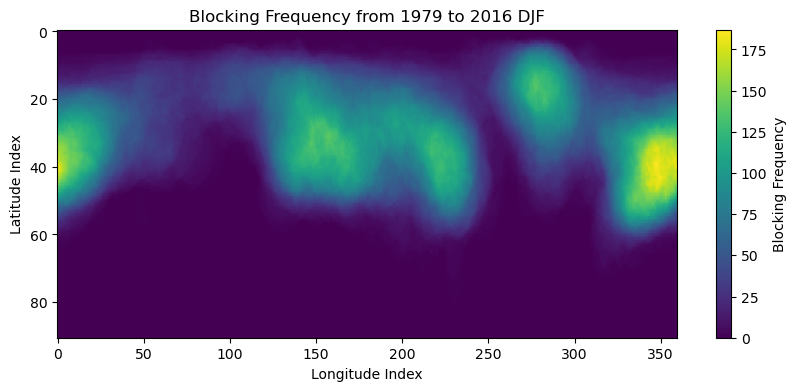

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .npy file
file_path = "/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/1979_2016 DJF/NH/BlockingFrequency.npy"
data = np.load(file_path)

# Print the dimensions of the loaded data
print("Dimensions of the dataset:", data.shape)

# Plot the data
plt.figure(figsize=(10, 4))
plt.imshow(data, cmap='viridis', aspect='auto')
plt.colorbar(label='Blocking Frequency')
plt.title('Blocking Frequency from 1979 to 2016 DJF')
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')
plt.show()


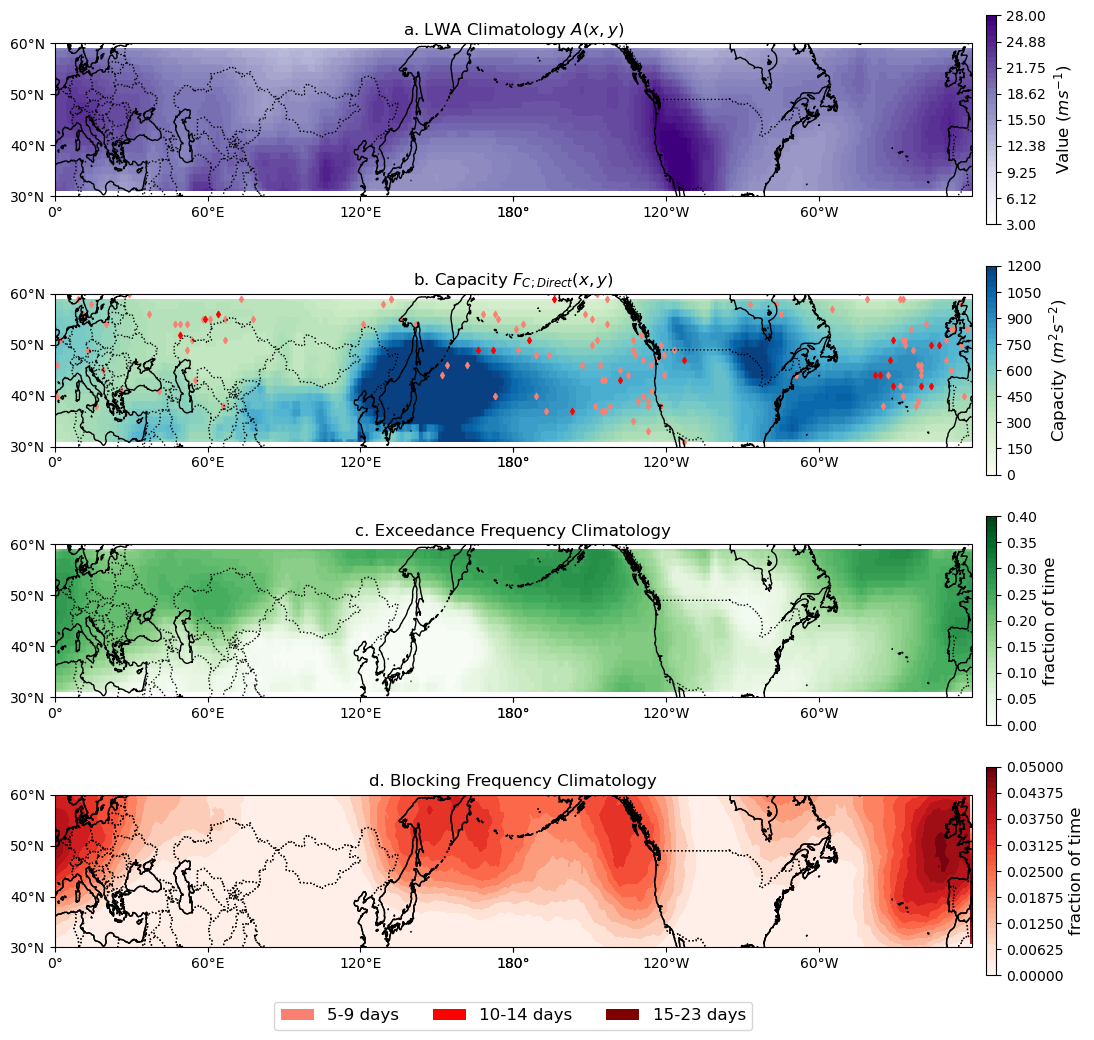

In [3]:
####### Fig 1 ver 0604 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Load data
output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model/"
A0_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_A0_winter.npy")
LWA_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_LWA_2Dmean_winter.npy")
slope_data_djf_file = os.path.join(output_directory, "alpha_regression_DJF", "slope_data_djf.npy")
reduced_Cg_file = os.path.join(output_directory, "hn2016-falwa_calculation", "reduced_Cg.npy")
capacity_file = os.path.join(output_directory, "hn2016-falwa_calculation", "NH18FluxCapacity.npy")
blocking_data_NH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0NH.npy")
blocking_data_SH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0SH.npy")

# Load the arrays
A0_winter = np.load(A0_winter_file)[80:101, :]
slope_data_djf = -np.load(slope_data_djf_file)[80:101, :]
reduced_Cg = np.load(reduced_Cg_file)[80:101, :]
capacity = np.load(capacity_file)
blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)
global_exceedance_freq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/global_exceedance_freq.npy")

y_range_data = global_exceedance_freq[80:101, :]


real_capacity = np.load('/depot/wanglei/etc/KenYan_Traffic_Model/Flux_Capacity_DJF.npy')
vmin_val = np.nanpercentile(real_capacity, 1)
vmax_val = np.nanpercentile(real_capacity, 99)
real_capacity = np.clip(real_capacity, vmin_val, vmax_val)


blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


# BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")

# # Latitude and Longitude data
Lat = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")

# # Filter out the latitudes that are outside of 30N to 60N
lat_indices = np.where((Lat >= 30) & (Lat <= 60))[0]
Lat = Lat[lat_indices]
# BlockingFreq = BlockingFreq[lat_indices, :]
BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/1979_2016 DJF/NH/BlockingFrequency.npy")[30:61, :]

# Other required data and calculations for the fourth plot
blocking_data = np.vstack((blocking_data_NH, blocking_data_SH))
filtered_blocking_data = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered_blocking_data.append(event)
blocking_data = np.array(filtered_blocking_data)

longitudes = [int(row[2].split(":")[1].strip()) for row in blocking_data]
latitudes = [int(row[3].split(":")[1].strip()) for row in blocking_data]
durations = [int(row[1].split(":")[1].strip()) for row in blocking_data]

blocking_grid_5_9 = np.zeros((121, 240))
blocking_grid_10_14 = np.zeros((121, 240))
blocking_grid_15_23 = np.zeros((121, 240))

for lon, lat, duration in zip(longitudes, latitudes, durations):
    if 5 <= duration <= 9:
        blocking_grid_5_9[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 10 <= duration <= 14:
        blocking_grid_10_14[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 15 <= duration <= 23:
        blocking_grid_15_23[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1

vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)
capacity = np.clip(capacity, vmin_val, vmax_val)
lat_indices = np.arange(int((30 + 90) * 121 / 180), int((60 + 90) * 121 / 180))
capacity_subset = capacity[lat_indices, :]
real_capacity_subset = real_capacity[lat_indices, :]
blocking_grid_5_9_subset = blocking_grid_5_9[lat_indices, :]
blocking_grid_10_14_subset = blocking_grid_10_14[lat_indices, :]
blocking_grid_15_23_subset = blocking_grid_15_23[lat_indices, :]

levs1 = np.linspace(3, 28, 41)
norm1 = BoundaryNorm(levs1, ncolors = 256, clip = True)

levs2 = np.linspace(0.1, 0.7, 41)
norm2 = BoundaryNorm(levs2, ncolors = 256, clip = True)

levs3 = np.linspace(0, 0.4, 41)
norm3 = BoundaryNorm(levs3, ncolors = 256, clip = True)

levs4 = np.linspace(0, 0.05, 41)
norm4 = BoundaryNorm(levs4, ncolors = 256, clip = True)
# levs4 = np.linspace(Blocking_percentage.min(), Blocking_percentage.max(), 41)
# norm4 = BoundaryNorm(levs4, ncolors=256, clip=True)

levs5 = np.linspace(0, 1200, 41)
norm5 = BoundaryNorm(levs5, ncolors = 256, clip = True)

fig, axs = plt.subplots(4, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})



# Define a common colormap for all plots
common_cmap = 'GnBu'

# Define function to plot each map with font adjustments
def plot_map(ax, data, title, transform=ccrs.PlateCarree(), cmap='GnBu', vmin=None, vmax=None, norm=None):
    ax.set_extent([0, 361, 30, 60], transform)
    heatmap = ax.imshow(data, extent=[0, 361, 30, 60], transform=transform, cmap=cmap, origin='lower', aspect=2, vmin=vmin, vmax=vmax, norm=norm)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([30, 40, 50, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_title(title, fontsize=12)  # Set font size for titles
    return heatmap

# Define individual colormaps for plots A, B, C, and D
cmap_A = 'Purples'
cmap_B = 'Greens'
cmap_C = 'Oranges'
cmap_D = 'Reds'

#convert to days
Blocking_percentage = BlockingFreq / 3430
Exceedance_percentage = y_range_data/ (4*3430) # 6hourly addition
# Plot 1-4 with updated colormaps
heatmap1 = plot_map(axs[0], A0_winter, r'a. LWA Climatology $A(x,y)$', cmap=cmap_A, norm = norm1)
heatmap3 = plot_map(axs[3], Blocking_percentage, r'd. Blocking Frequency Climatology', cmap=cmap_D, norm = norm4) 
heatmap4 = plot_map(axs[2], Exceedance_percentage, r'c. Exceedance Frequency Climatology', cmap=cmap_B, norm = norm3)

ax6 = axs[3]
contour = ax6.contourf(Lon, Lat, BlockingFreq, 15, transform=ccrs.PlateCarree(), cmap=cmap_D)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')

# Plot 4: Capacity with Blocking Events
ax4 = axs[1]
cs = plot_map(ax4, real_capacity_subset, r'b. Capacity $F_{C; Direct}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)


for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax4.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


# Add colorbars for each plot
cbar_labels = [r'Value ($ms^{-1}$)',r'Capacity ($m^2s^{-2}$)', 'fraction of time', 'fraction of time']
for i, heatmap in enumerate([heatmap1, cs, heatmap4, heatmap3]):
    cbar = fig.colorbar(heatmap, ax=axs[i], orientation='vertical', fraction=0.03, pad=0.015)
    cbar.set_label(cbar_labels[i], fontsize=12)



# Adjust legend for Plot 4 to spread horizontally and center below the plots
legend_elements = [
    Patch(facecolor='salmon', label='5-9 days'),
    Patch(facecolor='red', label='10-14 days'),
    Patch(facecolor='maroon', label='15-23 days')
]
# Place the legend at the center bottom of the figure
legend = axs[3].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=12)  # Set font size for legend



# Adjust layout to remove excessive margins
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02, wspace=-0.25, hspace=0.2)

# Show the plot
plt.show()

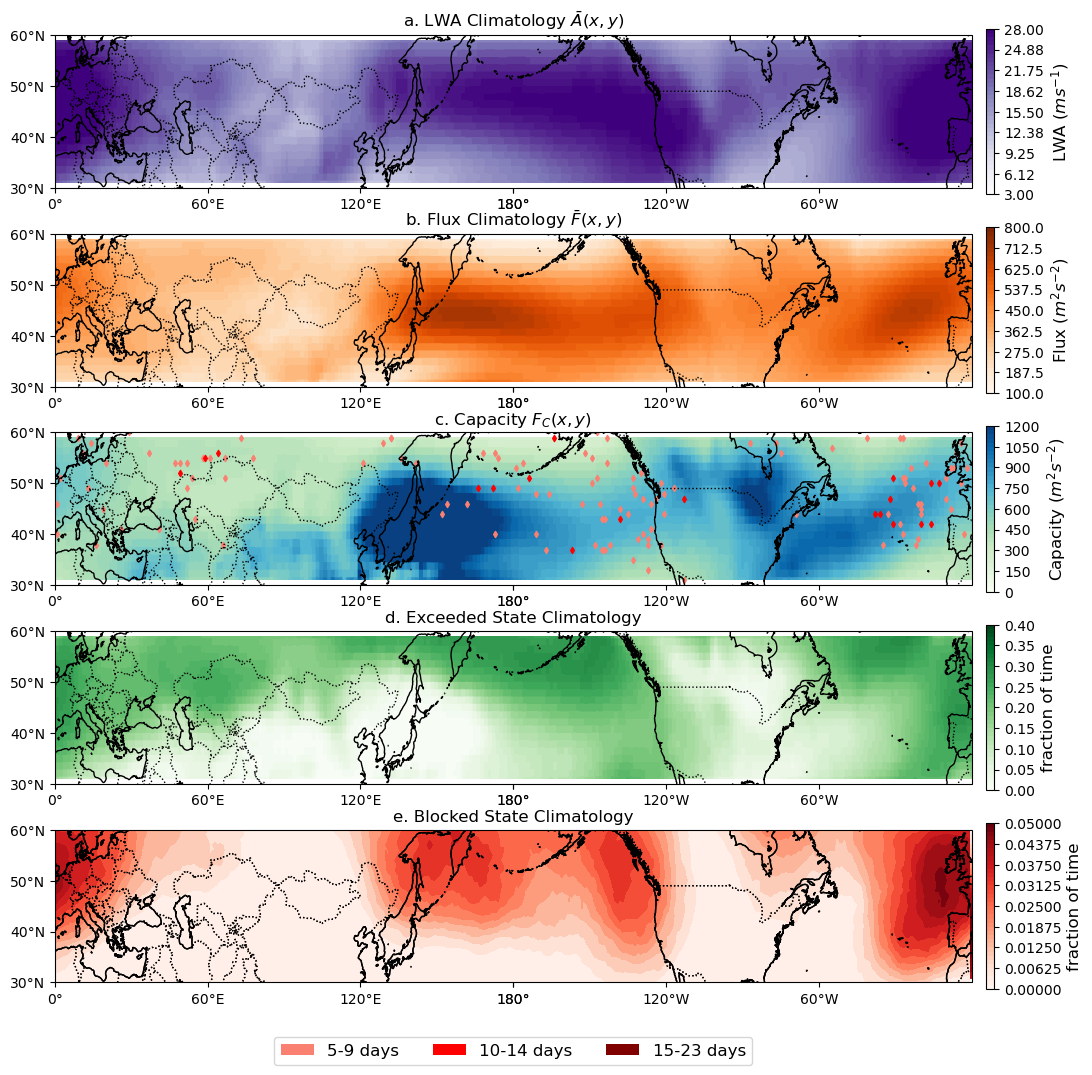

In [11]:
####### Fig 1 ver 0606 - FINAL Version
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Load data
output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model/"
A0_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_A0_winter.npy")
LWA_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_LWA_2Dmean_winter.npy")
Flux_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "mean_flux_winter.npy")
slope_data_djf_file = os.path.join(output_directory, "alpha_regression_DJF", "slope_data_djf.npy")
reduced_Cg_file = os.path.join(output_directory, "hn2016-falwa_calculation", "reduced_Cg.npy")
capacity_file = os.path.join(output_directory, "hn2016-falwa_calculation", "NH18FluxCapacity.npy")
blocking_data_NH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0NH.npy")
blocking_data_SH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0SH.npy")

# Load the arrays
A0_winter = np.load(A0_winter_file)[80:101, :]
A_winter = np.load(LWA_winter_file)[80:101, :]

Flux_winter = np.load(Flux_winter_file)[80:101, :]
Flux_winter_percentile_1 = np.percentile(Flux_winter, 1)
Flux_winter_percentile_99 = np.percentile(Flux_winter, 99)

slope_data_djf = -np.load(slope_data_djf_file)[80:101, :]
reduced_Cg = np.load(reduced_Cg_file)[80:101, :]
capacity = np.load(capacity_file)
blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)
global_exceedance_freq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/global_exceedance_freq.npy")

y_range_data = global_exceedance_freq[80:101, :]


real_capacity = np.load('/depot/wanglei/etc/KenYan_Traffic_Model/Flux_Capacity_DJF.npy')
vmin_val = np.nanpercentile(real_capacity, 1)
vmax_val = np.nanpercentile(real_capacity, 99)
real_capacity = np.clip(real_capacity, vmin_val, vmax_val)


blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


# BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")

# # Latitude and Longitude data
Lat = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")

# # Filter out the latitudes that are outside of 30N to 60N
lat_indices = np.where((Lat >= 30) & (Lat <= 60))[0]
Lat = Lat[lat_indices]
# BlockingFreq = BlockingFreq[lat_indices, :]
BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/1979_2016 DJF/NH/BlockingFrequency.npy")[30:61, :]

# Other required data and calculations for the fourth plot
blocking_data = np.vstack((blocking_data_NH, blocking_data_SH))
filtered_blocking_data = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered_blocking_data.append(event)
blocking_data = np.array(filtered_blocking_data)

longitudes = [int(row[2].split(":")[1].strip()) for row in blocking_data]
latitudes = [int(row[3].split(":")[1].strip()) for row in blocking_data]
durations = [int(row[1].split(":")[1].strip()) for row in blocking_data]

blocking_grid_5_9 = np.zeros((121, 240))
blocking_grid_10_14 = np.zeros((121, 240))
blocking_grid_15_23 = np.zeros((121, 240))

for lon, lat, duration in zip(longitudes, latitudes, durations):
    if 5 <= duration <= 9:
        blocking_grid_5_9[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 10 <= duration <= 14:
        blocking_grid_10_14[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 15 <= duration <= 23:
        blocking_grid_15_23[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1

vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)
capacity = np.clip(capacity, vmin_val, vmax_val)
lat_indices = np.arange(int((30 + 90) * 121 / 180), int((60 + 90) * 121 / 180))
capacity_subset = capacity[lat_indices, :]
real_capacity_subset = real_capacity[lat_indices, :]
blocking_grid_5_9_subset = blocking_grid_5_9[lat_indices, :]
blocking_grid_10_14_subset = blocking_grid_10_14[lat_indices, :]
blocking_grid_15_23_subset = blocking_grid_15_23[lat_indices, :]

levs1 = np.linspace(3, 28, 41)
norm1 = BoundaryNorm(levs1, ncolors = 256, clip = True)

# levs2 = np.linspace(Flux_winter_percentile_1, Flux_winter_percentile_99, 41)
levs2 = np.linspace(100, 800, 41)
norm2 = BoundaryNorm(levs2, ncolors = 256, clip = True)

levs3 = np.linspace(0, 0.4, 41)
norm3 = BoundaryNorm(levs3, ncolors = 256, clip = True)

levs4 = np.linspace(0, 0.05, 41)
norm4 = BoundaryNorm(levs4, ncolors = 256, clip = True)
# levs4 = np.linspace(Blocking_percentage.min(), Blocking_percentage.max(), 41)
# norm4 = BoundaryNorm(levs4, ncolors=256, clip=True)

levs5 = np.linspace(0, 1200, 41)
norm5 = BoundaryNorm(levs5, ncolors = 256, clip = True)

fig, axs = plt.subplots(5, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})



# Define a common colormap for all plots
common_cmap = 'GnBu'

# Define function to plot each map with font adjustments
def plot_map(ax, data, title, transform=ccrs.PlateCarree(), cmap='GnBu', vmin=None, vmax=None, norm=None):
    ax.set_extent([0, 361, 30, 60], transform)
    heatmap = ax.imshow(data, extent=[0, 361, 30, 60], transform=transform, cmap=cmap, origin='lower', aspect=2, vmin=vmin, vmax=vmax, norm=norm)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([30, 40, 50, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_title(title, fontsize=12)  # Set font size for titles
    return heatmap

# Define individual colormaps for plots A, B, C, and D
cmap_A = 'Purples'
cmap_B = 'Greens'
cmap_C = 'Oranges'
cmap_D = 'Reds'

#convert to days
Blocking_percentage = BlockingFreq / 3430
Exceedance_percentage = y_range_data/ (4*3430) # 6hourly addition
# Plot 1-4 with updated colormaps
heatmap1 = plot_map(axs[0], A_winter, r'a. LWA Climatology $\bar{A}(x,y)$', cmap=cmap_A, norm = norm1)
heatmap3 = plot_map(axs[4], Blocking_percentage, r'e. Blocked State Climatology', cmap=cmap_D, norm = norm4) 
heatmap4 = plot_map(axs[3], Exceedance_percentage, r'd. Exceeded State Climatology', cmap=cmap_B, norm = norm3)
heatmap5 = plot_map(axs[1], Flux_winter, r'b. Flux Climatology $\bar{F}(x,y)$', cmap=cmap_C, norm = norm2)

ax6 = axs[4]
contour = ax6.contourf(Lon, Lat, BlockingFreq, 15, transform=ccrs.PlateCarree(), cmap=cmap_D)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')

# Plot 4: Capacity with Blocking Events
ax4 = axs[2]
cs = plot_map(ax4, real_capacity_subset, r'c. Capacity $F_{C}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)


for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax4.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


# Add colorbars for each plot
cbar_labels = [r'LWA ($ms^{-1}$)',r'Flux ($m^2s^{-2}$)', r'Capacity ($m^2s^{-2}$)', 'fraction of time', 'fraction of time']
for i, heatmap in enumerate([heatmap1, heatmap5, cs, heatmap4, heatmap3]):
    cbar = fig.colorbar(heatmap, ax=axs[i], orientation='vertical', fraction=0.03, pad=0.015)
    cbar.set_label(cbar_labels[i], fontsize=12)



# Adjust legend for Plot 4 to spread horizontally and center below the plots
legend_elements = [
    Patch(facecolor='salmon', label='5-9 days'),
    Patch(facecolor='red', label='10-14 days'),
    Patch(facecolor='maroon', label='15-23 days')
]
# Place the legend at the center bottom of the figure
legend = axs[4].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=12)  # Set font size for legend



# Adjust layout to remove excessive margins
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02, wspace=-0.25, hspace=0.2)

# Show the plot
plt.show()

Blocking_normalized shape: (20, 240)
Exceedance_normalized shape: (20, 240)
Capacity_normalized shape: (20, 240)


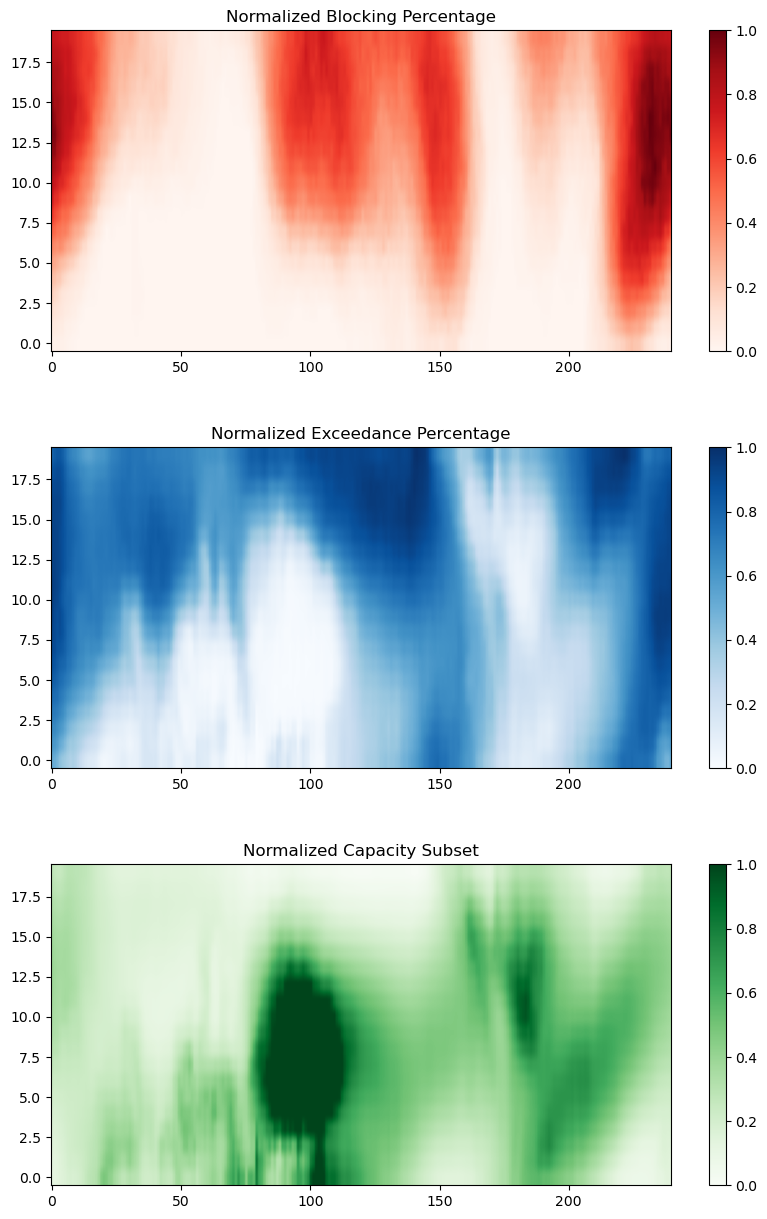

In [12]:
# 20240611 spatial correlation for c&d, c&e - part 1/2

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
from matplotlib.colors import Normalize

# Assuming Blocking_percentage, Exceedance_percentage, and real_capacity_subset are the input arrays
# with dimensions (31, 360), (21, 240), and (20, 240) respectively.

# Flipping the Blocking_percentage data vertically before trimming
Blocking_percentage = np.flipud(Blocking_percentage)

# Step 1: Trim the arrays
Blocking_percentage_trimmed = Blocking_percentage[:30, :]  # Trim to (30, 360)
Exceedance_percentage_trimmed = Exceedance_percentage[:20, :]  # Already (20, 240)
real_capacity_subset_trimmed = real_capacity_subset[:20, :]  # Already (20, 240)

# Step 2: Interpolate Blocking_percentage_trimmed from (30, 360) to (20, 240)
lon_360 = np.linspace(0, 360, 360)
lon_240 = np.linspace(0, 360, 240)
lat_30 = np.linspace(30, 60, 30)
lat_20 = np.linspace(30, 60, 20)

interpolator = interp2d(lon_360, lat_30, Blocking_percentage_trimmed, kind='cubic')
Blocking_percentage_interpolated = interpolator(lon_240, lat_20)

# Step 3: Normalize each dataset to [0, 1]
def normalize_data(data):
    return (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data))

Blocking_normalized = normalize_data(Blocking_percentage_interpolated)
Exceedance_normalized = normalize_data(Exceedance_percentage_trimmed)
Capacity_normalized = normalize_data(real_capacity_subset_trimmed)

# Print the shapes of the normalized arrays to verify dimensions
print("Blocking_normalized shape:", Blocking_normalized.shape)
print("Exceedance_normalized shape:", Exceedance_normalized.shape)
print("Capacity_normalized shape:", Capacity_normalized.shape)

# Step 4: Plot the heatmaps
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
norm = Normalize(vmin=0, vmax=1)  # Normalized range for all plots

# Plot normalized Blocking_percentage
axs[0].imshow(Blocking_normalized, aspect='auto', origin='lower', norm=norm, cmap='Reds')
axs[0].set_title('Normalized Blocking Percentage')

# Plot normalized Exceedance_percentage
axs[1].imshow(Exceedance_normalized, aspect='auto', origin='lower', norm=norm, cmap='Blues')
axs[1].set_title('Normalized Exceedance Percentage')

# Plot normalized real_capacity_subset
axs[2].imshow(Capacity_normalized, aspect='auto', origin='lower', norm=norm, cmap='Greens')
axs[2].set_title('Normalized Capacity Subset')

# Add colorbars and layout adjustments
plt.subplots_adjust(hspace=0.3)
for ax in axs:
    plt.colorbar(mappable=ax.images[0], ax=ax, orientation='vertical')

plt.show()


In [14]:
# 20240611 spatial correlation for c&d, c&e - part 2/2
import numpy as np

# Example check for shapes and NaNs or Infs
print("Shapes of arrays:")
print("Blocking: ", Blocking_normalized.shape)
print("Exceedance: ", Exceedance_normalized.shape)
print("Capacity: ", Capacity_normalized.shape)

print("\nCheck for NaNs or Infs:")
print("Blocking NaNs/Infs: ", np.isnan(Blocking_normalized).any(), np.isinf(Blocking_normalized).any())
print("Exceedance NaNs/Infs: ", np.isnan(Exceedance_normalized).any(), np.isinf(Exceedance_normalized).any())
print("Capacity NaNs/Infs: ", np.isnan(Capacity_normalized).any(), np.isinf(Capacity_normalized).any())

# Assuming no NaNs or Infs, if there are, they need to be handled appropriately.
# Flatten the arrays
Blocking_flattened = Blocking_normalized.flatten()
Exceedance_flattened = Exceedance_normalized.flatten()
Capacity_flattened = Capacity_normalized.flatten()

# Ensure all arrays are of the same length
if Blocking_flattened.shape == Exceedance_flattened.shape == Capacity_flattened.shape:
    # Compute the correlation matrix
    correlation_matrix = np.corrcoef([Blocking_flattened, Exceedance_flattened, Capacity_flattened])
    print("\nCorrelation matrix:")
    print(correlation_matrix)
else:
    print("Error: Arrays have different shapes.")



Shapes of arrays:
Blocking:  (20, 240)
Exceedance:  (20, 240)
Capacity:  (20, 240)

Check for NaNs or Infs:
Blocking NaNs/Infs:  False False
Exceedance NaNs/Infs:  False False
Capacity NaNs/Infs:  False False

Correlation matrix:
[[ 1.          0.62510224 -0.07959538]
 [ 0.62510224  1.         -0.67664737]
 [-0.07959538 -0.67664737  1.        ]]
